# Credit RIsk

https://drive.google.com/file/d/18fuLcW2ZSi4gz_ENkDFpySuS5s53GNYf/view?usp=sharing

El conjunto de datos proporcionado representa información sobre riesgo crediticio generada por un banco internacional con operaciones en Argentina. Estos datos han sido transformados y enriquecidos para reflejar diferentes situaciones y comportamientos de pago de los clientes que podrían afectar la precisión de los modelos de predicción de riesgos. El ejercicio consiste en identificar y analizar posibles sesgos en variables clave del conjunto de datos, tales como la edad del cliente, el monto del préstamo y el tipo de empleo, utilizando métodos de estadística descriptiva, pruebas de hipótesis y visualizaciones.





**Parte 1: Comprensión y Preparación de Datos**

Explorar el conjunto de datos. Utiliza métodos descriptivos para obtener una comprensión general de las características del conjunto de datos (por ejemplo, .describe(), .info()).
Identificar valores atípicos. Genera estadísticas descriptivas y visualizaciones (boxplots, scatter plots) para identificar outliers en 'monto_del_prestamo'.

**Parte 2: Análisis Exploratorio de Datos**
Análisis de sesgos por edad.
Usa groupby para calcular la tasa de incumplimiento promedio por grupo de edad.
Crea histogramas de edad para deudores y no deudores.
Realiza un t-test para comparar las tasas de incumplimiento entre menores de edad y otros grupos de edad.
Análisis de sesgos por monto del préstamo.
Genera histogramas de 'monto_del_prestamo' para visualizar la distribución de los montos para deudores y no deudores.
Compara las distribuciones de 'monto_del_prestamo' entre buenos y malos pagadores con un t-test.
Análisis de sesgos por tipo de empleo.
Usa groupby para comparar las tasas de incumplimiento entre diferentes tipos de empleo.
Explora la relación entre el estado laboral y la tasa de incumplimiento con visualizaciones adecuadas.

**Parte 3: Preparación de Datos para Modelado**
Limpieza de Datos. Asegúrate de que todos los datos estén correctamente codificados y de que no haya valores faltantes o irrelevantes en el conjunto de datos.
Selección de Características. Decide qué variables incluir en el modelo. Considera excluir variables con sesgos introducidos artificialmente para evaluar su impacto en el rendimiento del modelo.

**Parte 4: Modelado**
Entrenar un Modelo de Clasificación. Utiliza DecisionTreeClassifier para entrenar un modelo predictivo con los datos procesados.
Evaluación del Modelo.
Genera una matriz de confusión para evaluar el rendimiento del modelo.
Calcula la precisión, el recall y la exactitud del modelo.



In [36]:
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
import seaborn as sns

In [41]:
df = pd.read_csv("credit_risk.csv")

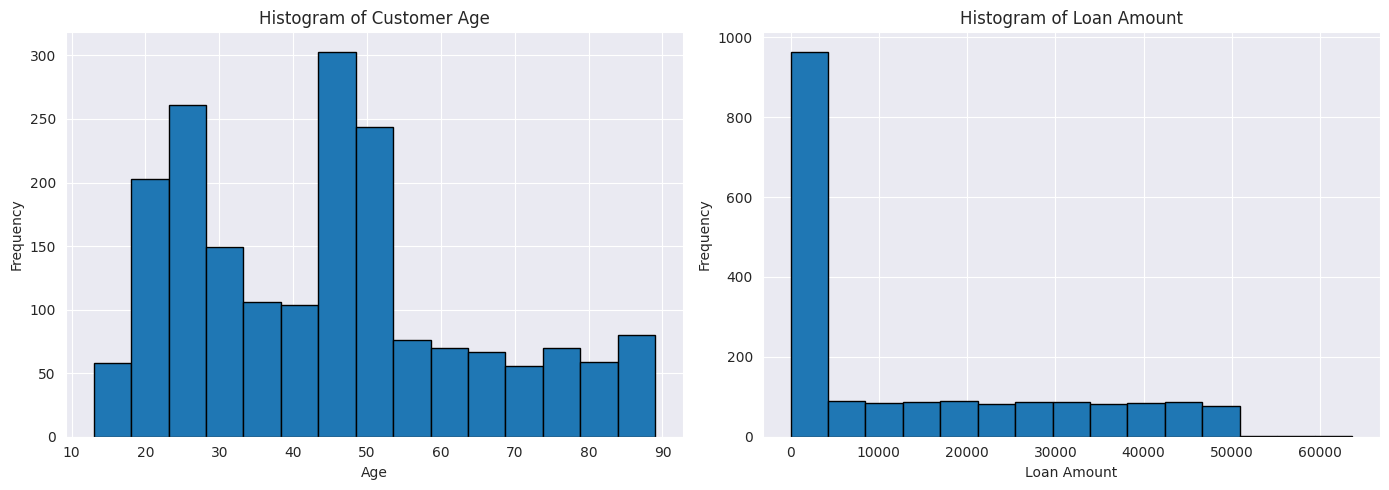

In [42]:
import matplotlib.pyplot as plt

# Set up the matplotlib figure
plt.figure(figsize=(14, 5))

# Histogram for customer_age
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
plt.hist(df['edad_del_cliente'], bins=15, edgecolor='black')
plt.title('Histogram of Customer Age')
plt.xlabel('Age')
plt.ylabel('Frequency')

# Histogram for loan_amount
plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot
plt.hist(df['monto_del_prestamo'], bins=15, edgecolor='black')
plt.title('Histogram of Loan Amount')
plt.xlabel('Loan Amount')
plt.ylabel('Frequency')

# Show the plot
plt.tight_layout()
plt.show()


/home/fede/.pyenv/versions/3.10.6/envs/default/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/fede/.pyenv/versions/3.10.6/envs/default/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


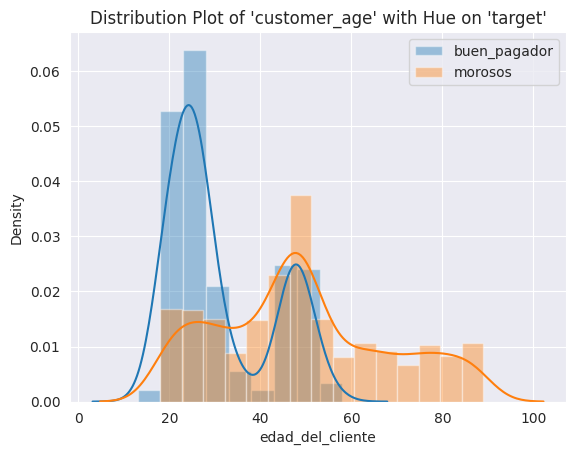

In [43]:
filtro1 = df["incumplimiento"] == 0
filtro2 = df["incumplimiento"] == 1

sns.distplot(df[filtro2]['edad_del_cliente'], label="buen_pagador")
sns.distplot(df[filtro1]['edad_del_cliente'], label="morosos")

plt.title("Distribution Plot of 'customer_age' with Hue on 'target'")
plt.legend()
plt.show()

# Generar modelo

In [5]:
# Split the dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Decision Tree classifier object
clf = DecisionTreeClassifier(max_depth=3)

# Train Decision Tree Classifier
clf = clf.fit(X_train, y_train)

# Predict the response for test dataset
y_pred = clf.predict(X_test)

# Creating a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Calculating metrics manually using the confusion matrix
tp, fn, fp, tn = conf_matrix.ravel()

# Metrics calculation
accuracy = (tp + tn) / (tp + tn + fp + fn)
precision = tp / (tp + fp) if (tp + fp) > 0 else 0  # Handling the case where tp + fp is 0
recall = tp / (tp + fn) if (tp + fn) > 0 else 0     # Handling the case where tp + fn is 0